# Project 2 - Part 1 - Matrices: From Information to Statistics

## Benjamin Hanson
## PHGN 311 - Mathematical Physics
## 11/13/2020

### 1. Get the Data

#### a.

In [65]:
%matplotlib inline
import numpy as np
from PIL import Image 
from matplotlib import image
from matplotlib import pyplot
from numpy import array
import csv
import matplotlib.pyplot as plt 
from numpy import array
from scipy.linalg import svd
import random
import os
import moviepy.video.io.ImageSequenceClip
import glob
from PIL import Image
import pyglet
import sympy 
import math
import cmath
from scipy.special import gamma
from sklearn.preprocessing import normalize

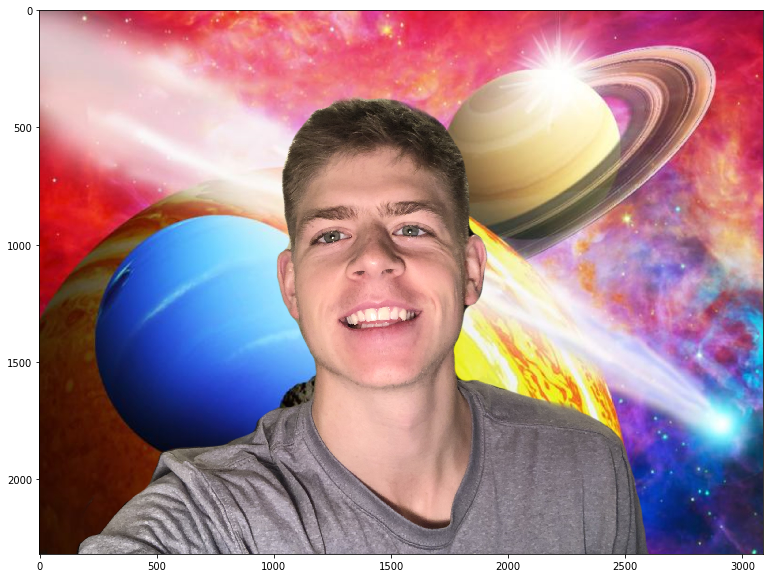

In [3]:
# Importing Selfie w/ some "slight" configurations

pyplot.figure(figsize=(15,10)) 
image = image.imread('Selfie.jpg')
pyplot.imshow(image)
pyplot.show()

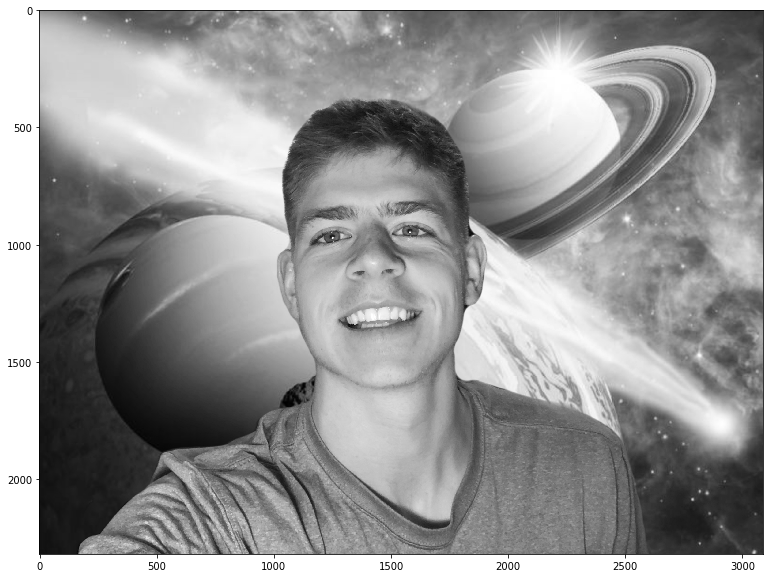

In [4]:
# Converting Image to Grayscale 
RGBdata = array(image)
pixel = 0
i = 0
j = 0
row = []
grayscaleMatrix = []
for i in range(len(RGBdata)):
    for j in range(len(RGBdata[0])):
        pixel = round(((0.3 * RGBdata[i][j][0]) + (0.59 * RGBdata[i][j][1]) + (0.11 * RGBdata[i][j][2]))) # Formula for converting RGB to grayscale
        row.append(pixel)
    grayscaleMatrix.append(row)
    row = []

pyplot.figure(figsize=(15,10)) 
pyplot.imshow(grayscaleMatrix, cmap="gray") 
pyplot.savefig("grayscaleSelfie.jpg")
pyplot.show() 

#### b.

In [197]:
#Writing Spreadsheets


# Matrix was already converted into matrix form above, so we will just write both of these matrices to a cvs file now
    
#Writing grayscale spreadsheet
with open('grayscaleSelfie.csv', 'w') as csvfile:    
    csvwriter = csv.writer(csvfile)
    csvwriter.writerows(grayscaleMatrix)

In [224]:
print("Rows in color matrix: ", len(RGBdata))
print("Columns in color matrix: ", len(RGBdata[0]))
print("Pixel Values in color matrix", len(RGBdata[0][0]))

print("Rows in grayscale matrix: ", len(grayscaleMatrix))
print("Columns in grayscale matrix: ", len(grayscaleMatrix[0]))

Rows in color matrix:  2320
Columns in color matrix:  3088
Pixel Values in color matrix 3
Rows in grayscale matrix:  2320
Columns in grayscale matrix:  3088


#### c. 

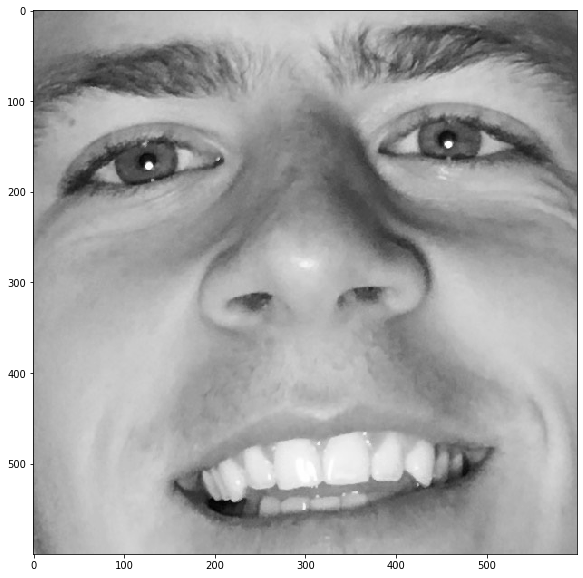

In [10]:
# Cropping Image

startingRow = 800
endingRow = 1400
startingColumn = 1125
endingColumn = 1725

croppedImage = []
croppedRow = []

i = 0
j = 0

row = startingRow
column = startingColumn
while(row < endingRow):
    while (column < endingColumn):
        croppedRow.append(int(grayscaleMatrix[row][column]))
        column = column + 1
    croppedImage.append(croppedRow)
    croppedRow = []
    row = row + 1
    column = startingColumn

pyplot.figure(figsize=(15,10)) 
pyplot.imshow(croppedImage, cmap="gray")
pyplot.savefig("croppedImage.jpg")
pyplot.show() 

In [201]:
#Writing Cropped grayscale spreadsheet
with open('croppedGrayscaleSelfie.csv', 'w') as csvfile:    
    csvwriter = csv.writer(csvfile)
    csvwriter.writerows(croppedImage)

### 2. Analysis Part 1: Deconstructing your Self

#### a.

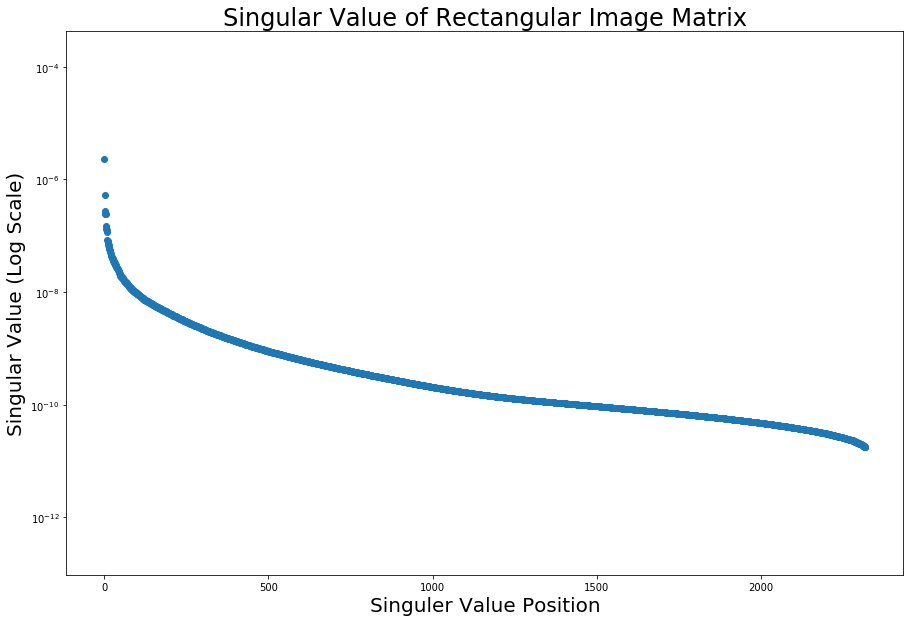

In [5]:
#Graphing the SVD values of both the random and non-random

rectangularU, rectangularSigma, rectangularVT = svd(grayscaleMatrix)  # Performing SVD

rectangularSigma = abs(rectangularSigma)
rectangularSigma = np.sort(rectangularSigma)
rectangularSigma = rectangularSigma[::-1] # Reverse Sorting Numpy Array

norm = 0
i = 0

for i in range(300):
    norm = norm + (rectangularSigma[i]*rectangularSigma[i])
    
rectangularSigma = rectangularSigma/norm    
    
i = 0
x = []
for i in range(len(rectangularSigma)):
    x.append(i)
    
# Plotting Log Scale Graph
plt.figure(figsize=(15,10)) 
plt.yscale("log")
plt.scatter(x, rectangularSigma)
plt.title('Singular Value of Rectangular Image Matrix', fontsize = 24)
plt.xlabel('Singuler Value Position', fontsize = 20) # Labeling the x-axis
plt.ylabel('Singular Value (Log Scale)', fontsize = 20) # Labeling the y-axis
plt.show()

#### b.

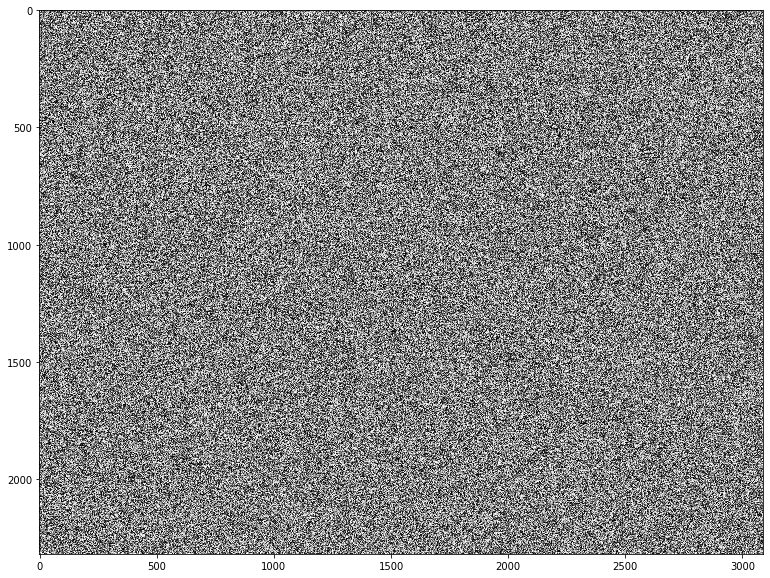

In [6]:
# Making random matrix

i = 0
j = 0
value = 0

randomMatrix = []
row = []

#Creating Random Matrix
for i in range(len(grayscaleMatrix)):
    for j in range(len(grayscaleMatrix[0])):
        value = random.randint(0,255)
        row.append(value)
    
    randomMatrix.append(row)
    row = []
    
# Making Picture from Random Array Matrix
pyplot.figure(figsize=(15,10)) 
plt.imshow(randomMatrix, cmap="gray") 
plt.show() 

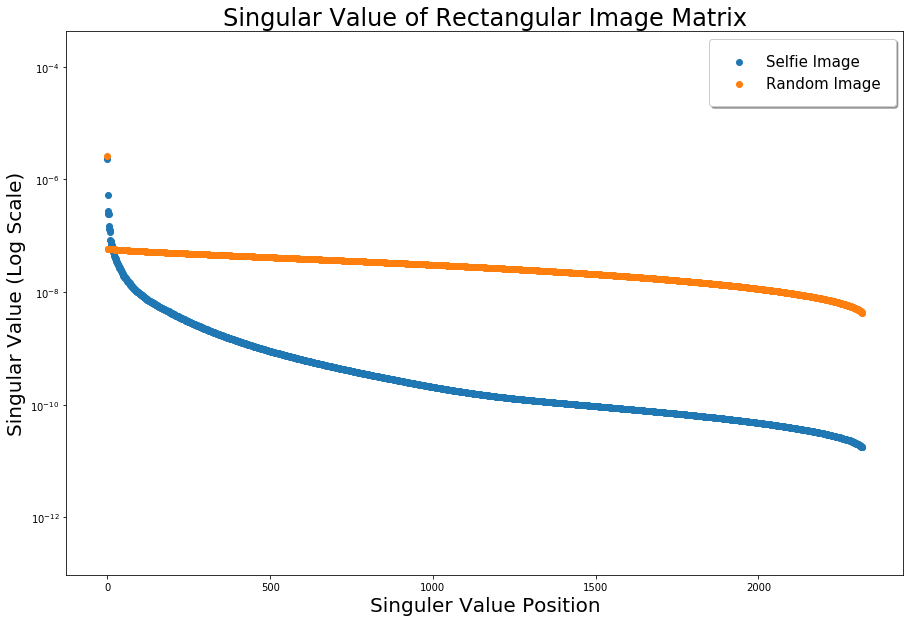

In [7]:
U, randomSigma, VT = svd(randomMatrix)  # Performing SVD

randomSigma = abs(randomSigma)
randomSigma = np.sort(randomSigma)
randomSigma = randomSigma[::-1] # Reverse Sorting Numpy Array

randomNorm = 0
i = 0

for i in range(300):
    randomNorm = randomNorm + (randomSigma[i]*randomSigma[i])
    
randomSigma = randomSigma/randomNorm  
    
# Plotting Log Scale Graph
plt.figure(figsize=(15,10)) 
plt.yscale("log")
plt.scatter(x, rectangularSigma, label = "Selfie Image")
plt.scatter(x, randomSigma, label = "Random Image")
plt.title('Singular Value of Rectangular Image Matrix', fontsize = 24)
plt.xlabel('Singuler Value Position', fontsize = 20) # Labeling the x-axis
plt.ylabel('Singular Value (Log Scale)', fontsize = 20) # Labeling the y-axis
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 15})
plt.show()

#### c.

#### d. 

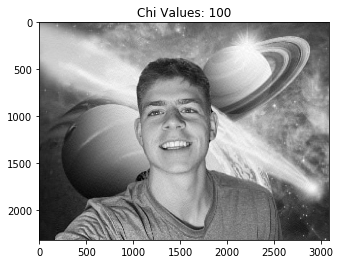

In [75]:
# Making an animation of building image


# Compiling 100 Images to build animation
row = []

i = 0
j = 0
k = 0
matrixSigma = []
while (i <= (100)):
    chi = i
    for j in range(len(grayscaleMatrix)):
        for k in range (len(grayscaleMatrix[0])):
            if (j == k):
                if (j < chi):
                    row.append(rectangularSigma[j])
                else:
                    row.append(0)
            else:
                row.append(0)
        matrixSigma.append(row)
        row = []
    
    inter = np.dot(rectangularU, matrixSigma)
    matrix = np.dot(inter, rectangularVT)
    plt.title("Chi Values: " + str(chi))
    plt.imshow(matrix, cmap="gray") 
    if (len(str(chi)) == 1):
        pyplot.savefig("Selfie Build/selfieImage000" + str(chi) + ".jpg")
    elif (len(str(chi)) == 2):
        pyplot.savefig("Selfie Build/selfieImage00" + str(chi) + ".jpg")
    elif (len(str(chi)) == 3):
        pyplot.savefig("Selfie Build/selfieImage0" + str(chi) + ".jpg")
    else:
        pyplot.savefig("Selfie Build/selfieImage" + str(chi) + ".jpg")
    matrixSigma = []
    i = i + 1

In [15]:
#MP4 of Selfie Building

image_folder='C:/Users/19136/PHGN 311/Project 2/SelfieBuild'
fps=4

image_files = [image_folder+'/'+img for img in os.listdir(image_folder) if img.endswith(".jpg")]
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
clip.write_videofile('selfie.mp4')

Moviepy - Building video selfie.mp4.
Moviepy - Writing video selfie.mp4



Moviepy - Done !
Moviepy - video ready selfie.mp4


In [16]:
#GIF of Selfie Building

# filepaths
fp_in = "C:/Users/19136/PHGN 311/Project 2/SelfieBuild/*.jpg"
fp_out = "selfie.gif"

# https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=125, loop=0)

### 3. Analysis Part 2: Self-Perspective

#### a. 

In [18]:
# Diagonalize Matrix

# Returns all diagonal values
D = np.diag(croppedImage)

#Making Diagonal Matrix
i = 0
j = 0
row = []
diagonalMatrix = []
for i in range(len(croppedImage)):
    for j in range (len(croppedImage[0])):
        if (i == j):
            row.append(D[j])
        else:
            row.append(0)
    diagonalMatrix.append(row)
    row = []

In [9]:
croppedU, croppedSigma, croppedVT = svd(croppedImage)

#Building SVD Matrix
i = 0
j = 0
row = []
svdCroppedMatrix = []
for i in range(len(croppedImage)):
    for j in range (len(croppedImage)):
        if (i == j):
            row.append(croppedSigma[j])
        else:
            row.append(0)
    svdCroppedMatrix.append(row)
    row = []

#### b. 

In [10]:
#Performin a Unitary Transform

def UnitaryTransform(transformer, matrix):
    
    transformedMatrix = []
    row = []
    i = 0
    j = 0
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            row.append(0)
        transformedMatrix.append(row)
        row = []
    
    i = 0
    j = 0
    pixel = 0
    vector = [[0],[0]]
    transformedVector = [[0],[0]]
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            vector = [[j], [i]]
            pixel = matrix[i][j]
            transformedVector = np.dot(transformer, vector)
            transformedMatrix[int(transformedVector[1])][int(transformedVector[0])] = pixel
    
    return transformedMatrix          

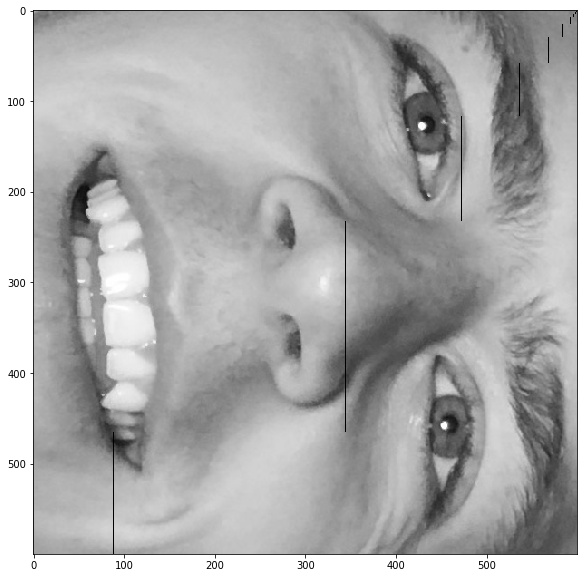

In [11]:
#Building Rotation Matrix
theta = math.pi/2
rotationMatrix = [[math.cos(theta), -math.sin(theta)],[math.sin(theta), math.cos(theta)]]


# Rotating Image using Function Definition
rotatedImage = UnitaryTransform(rotationMatrix, croppedImage)
pyplot.figure(figsize=(15,10)) 
plt.imshow(rotatedImage, cmap="gray") 
plt.show() 

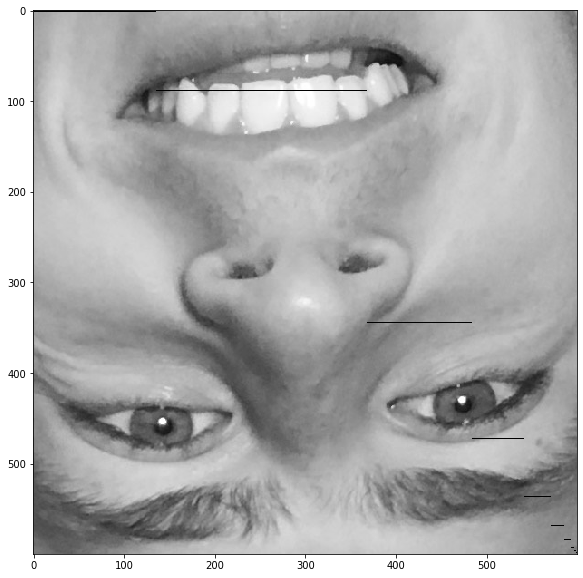

In [39]:
# Testing Another Angle
theta = math.pi
rotationMatrix = [[math.cos(theta), -math.sin(theta)],[math.sin(theta), math.cos(theta)]]


# Rotating Image using Definition
rotatedImage = UnitaryTransform(rotationMatrix, croppedImage)
pyplot.figure(figsize=(15,10)) 
plt.imshow(rotatedImage, cmap="gray") 
plt.show() 

#### c. 

In [13]:
# Performing a Non-Unitary Transform - Stretching in the Y-Direction

def yStretch(transformer, matrix, stretchFactor):
    transformedMatrix = []
    row = []
    i = 0
    j = 0
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            row.append(0)
        transformedMatrix.append(row)
        row = []
    
    i = 0
    j = 0
    pixel = 0
    vector = [[0],[0]]
    pixelRow = []
    pixelLocation = []
    pixelMatrix = []
    transformedVector = [[0],[0]]
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            vector = [[i], [j]]
            pixel = matrix[i][j]
            transformedVector = np.dot(transformer, vector)
            pixelCoordinate = [int(transformedVector[1]), int(transformedVector[0]), pixel]
            pixelRow.append(pixelCoordinate)
        pixelMatrix.append(pixelRow)
        pixelRow = []
    
    row = []
    k = 0
    transformedMatrix = []
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            row.append(pixelMatrix[i][j][2])
        while (k < stretchFactor):
            transformedMatrix.append(row)
            k += 1
        k = 0
        row = []
        
    return transformedMatrix                 

In [15]:
# Testing out Non-Unitary Matrix

# Non-unitary Y-Stretching Matrix
stretchFactor = 2
transformer = [[stretchFactor,0],[0,1]]
stretchedImage = yStretch(transformer, croppedImage, stretchFactor)

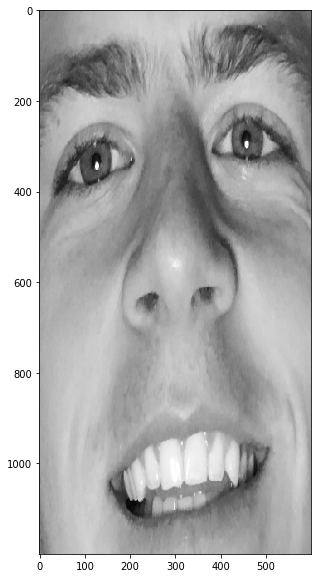

In [16]:
# Plotting Stretched Image
pyplot.figure(figsize=(15,10)) 
plt.imshow(stretchedImage, cmap="gray") 
plt.show() 

In [17]:
# Increased Stretch

stretchFactor = 10
transformer = [[stretchFactor,0],[0,1]]
stretchedImage = yStretch(transformer, croppedImage, stretchFactor)

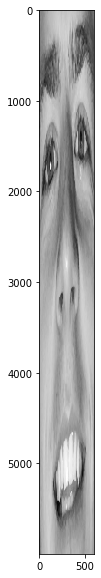

In [18]:
# Making Picture from Random Array Matrix
pyplot.figure(figsize=(15,10)) 
plt.imshow(stretchedImage, cmap="gray") 
plt.show() 

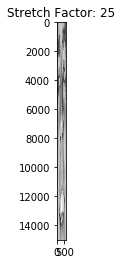

In [191]:
# Making an animation of building image - Did this just for fun


# Compiling 25 Images to build animation

i = 1
matrixSigma = []
while (i <= (25)):
    stretchFactor = i
    transformer = [[stretchFactor,0],[0,1]]
    stretchedImage = yStretch(transformer, croppedImage, stretchFactor)
    plt.title("Stretch Factor: " + str(i))
    plt.imshow(stretchedImage, cmap="gray") 
    if (len(str(i)) == 1):
        pyplot.savefig("StretchedSelfie/stretched0" + str(i) + ".jpg")
    else:
        pyplot.savefig("StretchedSelfie/stretched" + str(i) + ".jpg")
    i = i + 1

In [192]:
#GIF of Stretching

# filepaths
fp_in = "C:/Users/19136/PHGN 311/Project 2/StretchedSelfie/*.jpg"
fp_out = "stretched.gif"

# https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=100, loop=0)

#### d.

## Project 2 - Part 2 

### 4. Analysis Part 3: Chaos and Randomness

#### a. 

A Hermitian Matrix is one that is equal to its own conjugate transpose. A Unitary matrix is one whose inverse is equal to its conjugate transpose. We can test both of these out on our cropped image matrix.

In [11]:
def TestingHermitian(matrix):
    
    
    matrix = np.array(matrix)
    conjugateTranspose = np.transpose(np.conj(matrix))
    
    i = 0
    j = 0
    x = 0
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if (matrix[i][j] != conjugateTranspose[i][j]):
                x += 1
                
    if (x == 0):
        print("This matrix is a Hermitian Matrix.")
    else:
        print("This matrix is not a Hermitian Matrix.")
        
    return

In [12]:
TestingHermitian(croppedImage)

This matrix is not a Hermitian Matrix.


In [13]:
# Testing on known Hermitian Matrix to see if it works

matrix = [[1,0], [0,1]]
TestingHermitian(matrix)

This matrix is a Hermitian Matrix.


In [14]:
def TestingUnitary(matrix):
    
    
    matrix = np.array(matrix)
    inverseMatrix = np.transpose(matrix)
    conjugateTranspose = np.transpose(np.conj(matrix))
    
    i = 0
    j = 0
    x = 0
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if (conjugateTranspose[i][j] != inverseMatrix[i][j]):
                x += 1
                
    if (x == 0):
        print("This matrix is a Unitary Matrix.")
    else:
        print("This matrix is not a Unitary Matrix.")
        
    return

In [15]:
TestingUnitary(croppedImage)

This matrix is a Unitary Matrix.


In [16]:
# Testing on known non-Unitary Matrix to see if it works

nonUnitaryMatrix = [[complex(3,4), complex(0,1)],[complex(5,2), complex(1,1)]]
TestingUnitary(nonUnitaryMatrix)

This matrix is not a Unitary Matrix.


It would make sense that our matrix is unitary but not hermitian. Because the cropped image contains pixel color values, all of the cells would have to be real, meaning taking the complex conjugate would return the same matrix, and thus the conjugate transpose would just equal to the transpose, or the inverse. The Hermitian constraint requires that the matrix itself is equal to the transpose, which means it would have to be symmetrical across the diagonal. Looking at the image, we can see that this is obviously not the case

#### b. 

Since we already diagonalize previously, we can just use that list here.

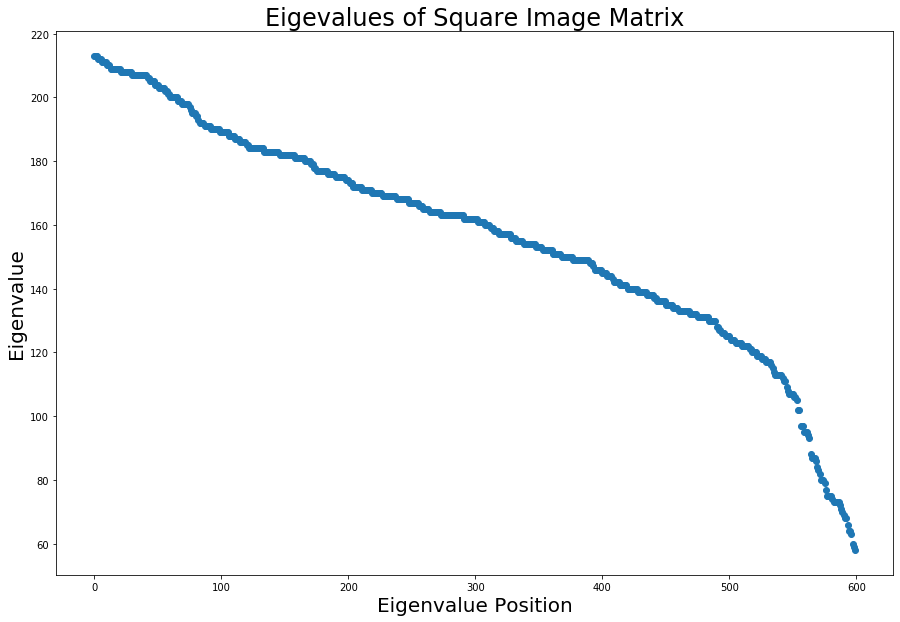

In [19]:
diagCropped = np.sort(D)
diagCropped = diagCropped[::-1] # Reverse Sorting Numpy Array
    
i = 0
x = []
for i in range(len(diagCropped)):
    x.append(i)
    
# Plotting Graph
plt.figure(figsize=(15,10)) 
plt.scatter(x, diagCropped)
plt.title('Eigevalues of Square Image Matrix', fontsize = 24)
plt.xlabel('Eigenvalue Position', fontsize = 20) # Labeling the x-axis
plt.ylabel('Eigenvalue', fontsize = 20) # Labeling the y-axis
plt.show()

Degenerate or near-degenerate eigenvalues mean the eigenvalues we have are similar or near-similar. As we can see from this plot, we have a small range of eigenvalues, and they seem to be very close to each other, but it will be hard to tell without a random matrix's eigenvalues to compare to. We will do that in the next part, and ensure that our image is not random. The largest eigenvalue can be used to predict the stability of the system, meaning it is the most important in building our image. 

#### c. 

In [20]:
# Making random matrix

i = 0
j = 0
value = 0

randomMatrix = []
row = []

#Creating Random Matrix
for i in range(len(croppedImage)):
    for j in range(len(croppedImage[0])):
        value = random.randint(0,255)
        row.append(value)
    
    randomMatrix.append(row)
    row = []


#Diagonalizing Random Matrix
randomEigen = np.diag(randomMatrix)
randomEigen = np.sort(randomEigen)
randomEigen = randomEigen[::-1]

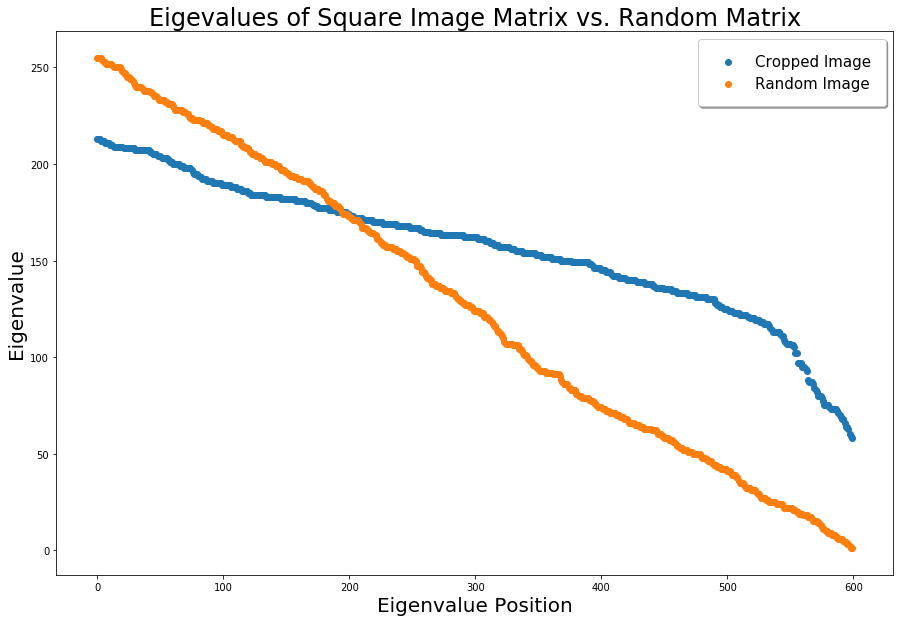

In [21]:
# Plotting Log Scale Graph
plt.figure(figsize=(15,10)) 
plt.scatter(x, diagCropped, label = "Cropped Image")
plt.scatter(x, randomEigen, label = "Random Image")
plt.title('Eigevalues of Square Image Matrix vs. Random Matrix', fontsize = 24)
plt.xlabel('Eigenvalue Position', fontsize = 20) # Labeling the x-axis
plt.ylabel('Eigenvalue', fontsize = 20) # Labeling the y-axis
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 15})
plt.show()

As we can see, the eigenvalues of the random matrix have a much bigger spread, meaning that they are much more different from each other than that of our cropped image. This means that our cropped image is, of course, not random. It is not perfectly symmetrical either, or else we would see these eigenvalues would be identical, but we also know that they are near-degenerate, meaning they are not random. 

#### d. 

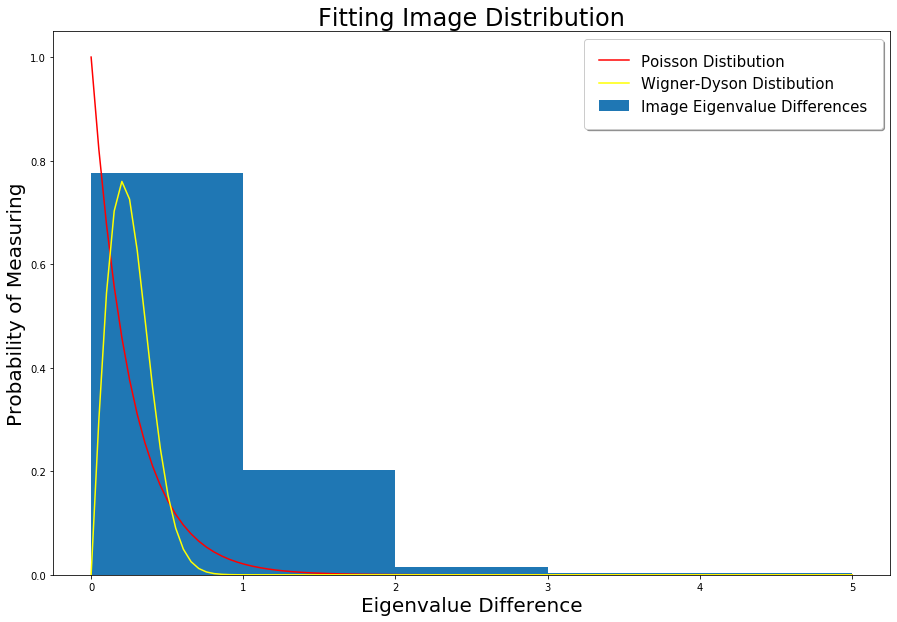

In [40]:
# Plotting Histogram

i = 0
imageDifference = []
randomDifference = []
for i in range(len(diagCropped) - 1):
    imageDifference.append(abs(diagCropped[i+1] - diagCropped[i]))
      
        
i = 0
for i in range(len(diagCropped) - 1):
    randomDifference.append(abs(randomEigen[i+1] - randomEigen[i]))                        

averageImageDifference = sum(imageDifference)/(len(imageDifference))

difference = np.linspace(0, 5, 100)
poisson = []
wigner = []
for i in range(len(difference)):
    poisson.append(math.exp(-difference[i]/averageImageDifference))
    wigner.append((0.5)*math.pi*(difference[i]/averageImageDifference)*math.exp(((-math.pi)*((difference[i])**2))/(4*(averageImageDifference**2))))
    
plt.figure(figsize=(15,10)) 
plt.hist(imageDifference, bins = 5, density = True, label = "Image Eigenvalue Differences")
plt.plot(difference, poisson, 'r', label = "Poisson Distibution")
plt.plot(difference, wigner, 'yellow', label = "Wigner-Dyson Distibution")
plt.title('Fitting Image Distribution', fontsize = 24)
plt.xlabel('Eigenvalue Difference', fontsize = 20) # Labeling the x-axis
plt.ylabel('Probability of Measuring', fontsize = 20) # Labeling the y-axis
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 15})
plt.show()

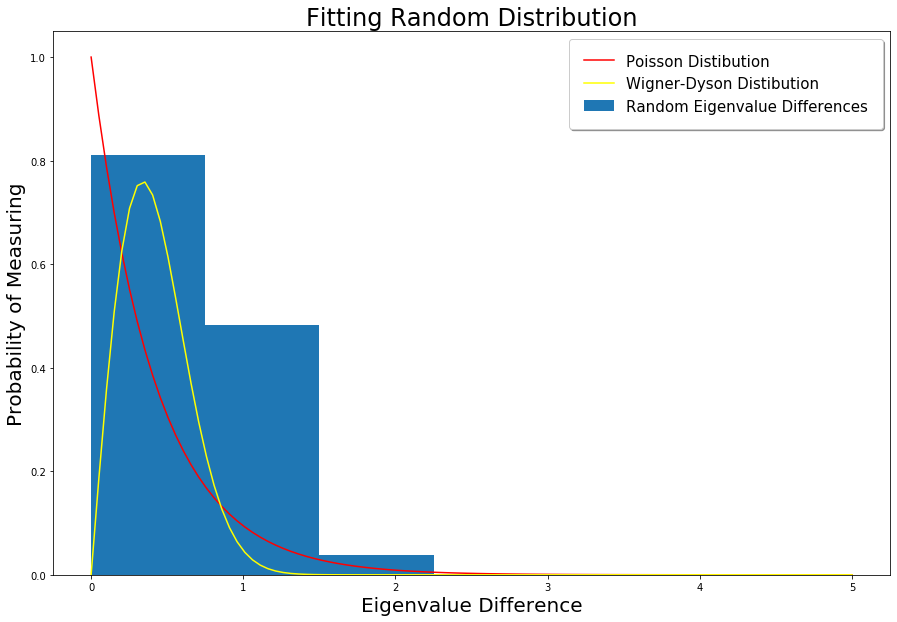

In [41]:
averageRandomDifference = sum(randomDifference)/(len(randomDifference))

difference = np.linspace(0, 5, 100)
randomPoisson = []
randomWigner = []
for i in range(len(difference)):
    randomPoisson.append(math.exp(-difference[i]/averageRandomDifference))
    randomWigner.append((0.5)*math.pi*(difference[i]/averageRandomDifference)*math.exp(((-math.pi)*((difference[i])**2))/(4*(averageRandomDifference**2))))
    
plt.figure(figsize=(15,10)) 
plt.hist(randomDifference, bins = 4, density = True, label = "Random Eigenvalue Differences")
plt.plot(difference, randomPoisson, 'r', label = "Poisson Distibution")
plt.plot(difference, randomWigner, 'yellow', label = "Wigner-Dyson Distibution")
plt.title('Fitting Random Distribution', fontsize = 24)
plt.xlabel('Eigenvalue Difference', fontsize = 20) # Labeling the x-axis
plt.ylabel('Probability of Measuring', fontsize = 20) # Labeling the y-axis
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 15})
plt.show()

Judging from these plots, I would say that the Image marix shows a definite Poisson distribution. This would make sense, as it means that the eigenvalues of the image matrix are degenerate or near-degenerate, so a majority of their differences would be close to 0. However, the random matrix looks to be leaning more towards the Wigner-Dyson distribution, as it does not die off as quickly as the image does. This would also make sense, in that the random eigenvalues should not be degenerate, meaning their differences don't have to be that close to 0. 

#### e.

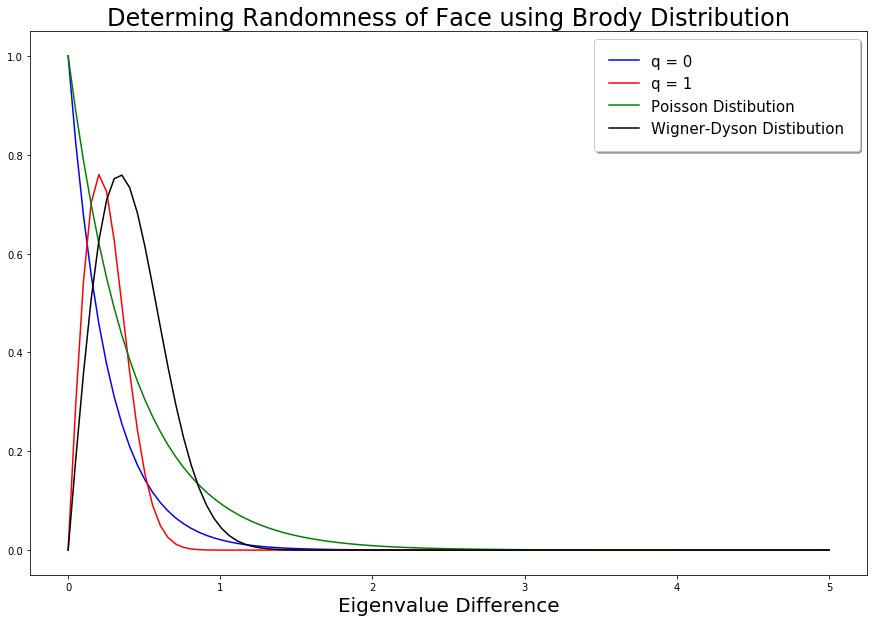

In [44]:
# Brody Distribution

q = 0
s = difference/(averageImageDifference)
b0 = (gamma((2+q)/(1+q)))**(q+1)

i = 0
brody0 = []
for i in range(len(s)):
    brody0.append(b0*(1+q)*((s[i])**q)*math.exp(-b0*(s[i])**(q+1)))

q = 1
b1 = (gamma((2+q)/(1+q)))**(q+1)

i = 0
brody1 = []
for i in range(len(s)):
    brody1.append(b1*(1+q)*((s[i])**q)*math.exp(-b1*(s[i])**(q+1)))
    
plt.figure(figsize=(15,10)) 
plt.plot(difference, brody0, 'b', label = "q = 0")
plt.plot(difference, brody1, 'r', label = "q = 1")
plt.plot(difference, randomPoisson, 'green', label = "Poisson Distibution")
plt.plot(difference, randomWigner, 'black', label = "Wigner-Dyson Distibution")
plt.title('Determing Randomness of Face using Brody Distribution', fontsize = 24)
plt.xlabel('Eigenvalue Difference', fontsize = 20) # Labeling the x-axis
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 15})
plt.show()

As we can see in this plot, our cropped Image does not fit perfectly with either the Poisson distribution (when q = 0 in the Brody distribution) or the Wigner-Dyson Distribution (when q = 1 in the Brody Distribution), however it is extremely close to both. If I had to choose one I would most likely say the Poisson Distribution looks closer to correct, but it is most likely that our image is in between random and symmetrical, which conceptually makes sense. Obviously, the picture provided is not random, but it is also not perfectly symmetrical. Therefore, it would make sense that it exists somewhere in between these states.

### 5. Analysis Part 4: Selfie Entropy 

#### a. 

Assuming that our state matrix, lets call it p, is Hermitian, as it should be, we know that p such that:

(1) p = U*D*U_dagger

Assuming that the given von Neumann entropy equation is:

(2) S = -Tr(p*log(p))

and we plug in our definition for p from Equation 1 into Equation 2 we get:

(3) S = -Tr((U*D*U_dagger)*log(U*D*U_dagger))
    S = -Tr(U*D*U_dagger*U*log(D)*U_dagger)
    S = -Tr(U*D*log(D)*U_dagger)
    S = -Tr(D*log(D)*U*U_dagger)
    S = -Tr(D*log(D)
    
and now we have the von Neumann equation in terms of just our diagonalized matrix. This exact same thing works for the SVDs as well. From Equation 1, we can see that if instead of diagonalizing, we solve for the SVDs, we can perform the same linear algerba and end of with the following equation:

(4) S = -Tr(sigma*log(sigma)

where sigma is our singular values in matrix form. For this reason, when the trace is basis independent, we can just use our SVDs for M. As for the log base, since entropy is usually measured in bits, we often use log base 2. However, we can use any log base to solve for entropy, and we will get the entropy of that base. Since all log bases are equivalent to each other by some conversion factor, we can easily convert from entropy in base 10 to entropy in base 2 if needed. But the base 10 entropy will still be technically correct, just in base 10 only. For this reason, the log base that we use doesn't matter, and we could even use natural log if we wanted to. 

#### b. 

In [144]:
def Entropy(svd):

    logSVD = []
    row = []
    for i in range(len(svd)):
        for j in range (len(svd[0])):
            if (svd[i][j] != 0):
                row.append(math.log(svd[i][j], 10))
            else:
                row.append(0)
        logSVD.append(row)
        row = [] 
    return np.trace(np.matmul(svd,logSVD))

In [246]:
U, sigma, VT = svd(array(croppedImage))  # Performing SVD

entropyList = []
svdMatrix = []
row = []

i = 1
j = 0
k = 0
while (i <= len(sigma)):
    for j in range(i):
        for k in range(i):
            if (j == k):
                row.append(sigma[j])
            else:
                row.append(0)
        svdMatrix.append(row)
        row = []
    entropy = Entropy(svdMatrix)
    entropyList.append(entropy)
    svdMatrix = []
    i += 1

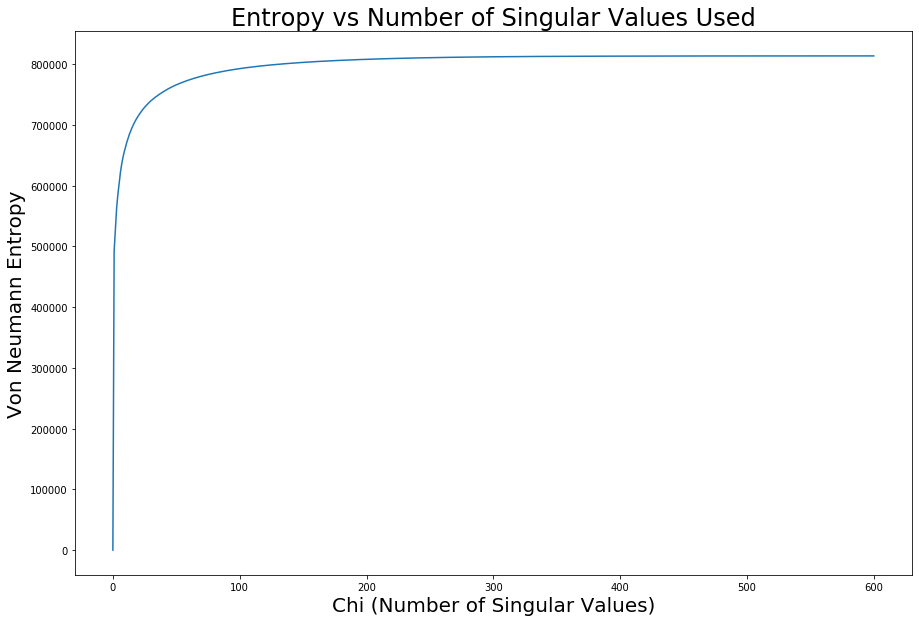

In [247]:
entropyList.insert(0,0)
chi = np.linspace(0, len(sigma), len(sigma)+1)

plt.figure(figsize=(15,10)) 
plt.title('Entropy vs Number of Singular Values Used', fontsize = 24)
plt.xlabel('Chi (Number of Singular Values)', fontsize = 20) # Labeling the x-axis
plt.ylabel('Von Neumann Entropy', fontsize = 20) # Labeling the x-axis
plt.plot(chi, entropyList)
plt.show()

#### c.

This graph looks like some sort of function that can be easily modeled, with a constant offset. There looks to be a horizontal asymptote at around 800,000, so we will have to include that in our model. One way to test what kind of model would best fit this graph would be to graph the plot with semi-log and log-log axes, and see its shape under these conditions.

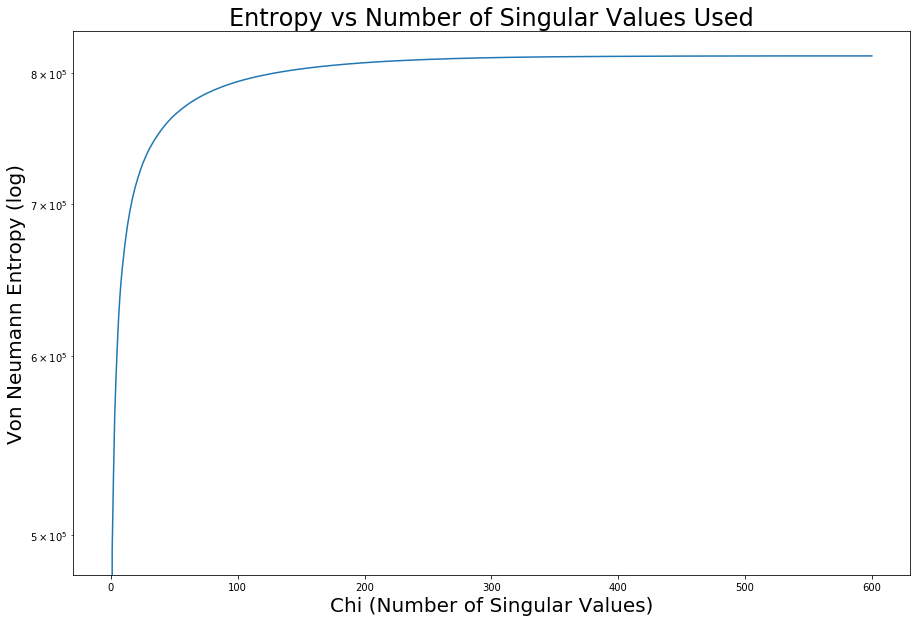

In [248]:
plt.figure(figsize=(15,10)) 
plt.title('Entropy vs Number of Singular Values Used', fontsize = 24)
plt.yscale("log")
plt.xlabel('Chi (Number of Singular Values)', fontsize = 20) # Labeling the x-axis
plt.ylabel('Von Neumann Entropy (log)', fontsize = 20) # Labeling the x-axis
plt.plot(chi, entropyList)
plt.show()

This does not tell us much about the plot, as it is the same exact plot as without the log scale. Let's test out our function with a log-log scale to see if that tells us anything.

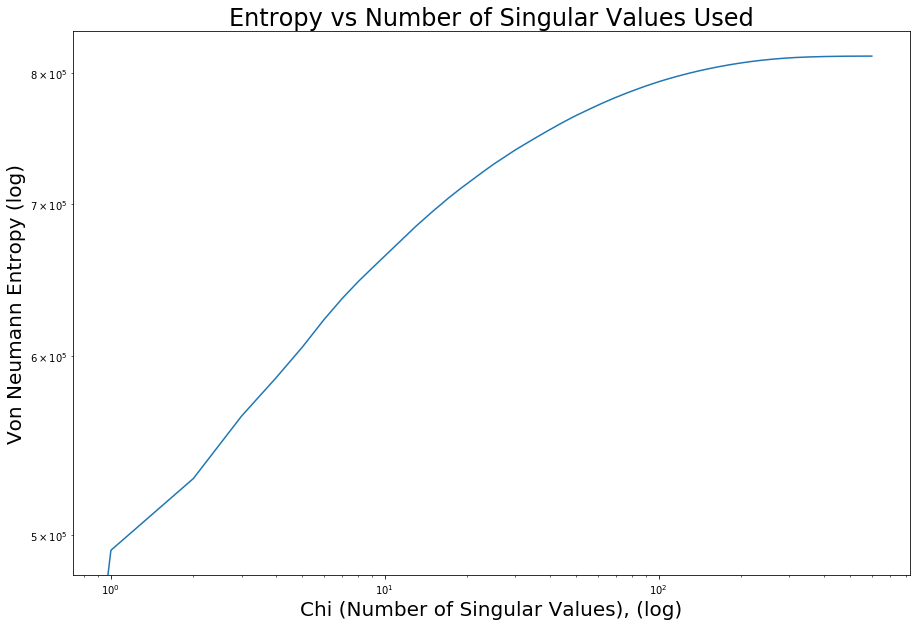

In [249]:
plt.figure(figsize=(15,10)) 
plt.title('Entropy vs Number of Singular Values Used', fontsize = 24)
plt.yscale("log")
plt.xscale("log")
plt.xlabel('Chi (Number of Singular Values), (log)', fontsize = 20) # Labeling the x-axis
plt.ylabel('Von Neumann Entropy (log)', fontsize = 20) # Labeling the x-axis
plt.plot(chi, entropyList)
plt.show()

As we can, this plot is almost linear with a log-log scale, meaning our model should have some inverse power law form (x^-power), with a built-in horizontal asymptote at around 800,000. That would mean our model would have the form:

x = 800,000(1 - x^-power)

We will test out different powers until we get something that is close to our actual entropy measurements.

C:\Users\19136\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


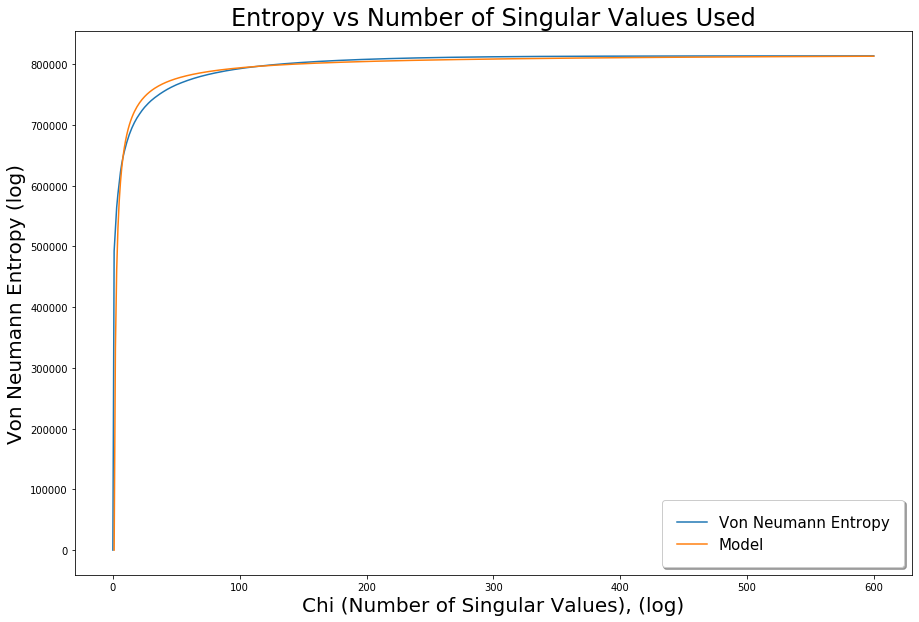

In [250]:
model = []
for i in range(len(chi)):
    model.append((820000*(1 - (chi[i])**(-0.75))))

plt.figure(figsize=(15,10)) 
plt.title('Entropy vs Number of Singular Values Used', fontsize = 24)
plt.xlabel('Chi (Number of Singular Values), (log)', fontsize = 20) # Labeling the x-axis
plt.ylabel('Von Neumann Entropy (log)', fontsize = 20) # Labeling the x-axis
plt.plot(chi, entropyList, label = "Von Neumann Entropy")
plt.plot(chi, model, label = "Model")
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 15})
plt.show()

A goodness of criteria that we can use for this is the chi-square value, which is:

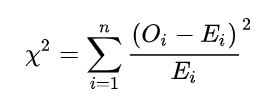



where our observed is the actual entropy found and the expected is the models value. We can do the summation using a simple for loop.

In [251]:
# Chi-square GOF

# Removing Values that would interfere with solving for Chi-squared
del entropyList[0]
del entropyList[0]
del model[0]
del model[0]

#Finding Chi-squared
chiSquared = 0
for i in range(len(entropyList)):
    chiSquared += (((entropyList[i]-model[i])**2)/(model[i]))

    
print("Chi^2 =", chiSquared)

Chi^2 = 167871.44339545365


This value will sort of be meaningless until we find the chi-squared value of a random matrix, so we will do that next.

#### d.

In [287]:
U, randomSigma, VT = svd(array(randomMatrix))  # Performing SVD

randomEntropyList = []
svdMatrix = []
row = []

i = 1
j = 0
k = 0
while (i <= len(randomSigma)):
    for j in range(i):
        for k in range(i):
            if (j == k):
                row.append(randomSigma[j])
            else:
                row.append(0)
        svdMatrix.append(row)
        row = []
    entropy = Entropy(svdMatrix)
    randomEntropyList.append(entropy)
    svdMatrix = []
    i += 1

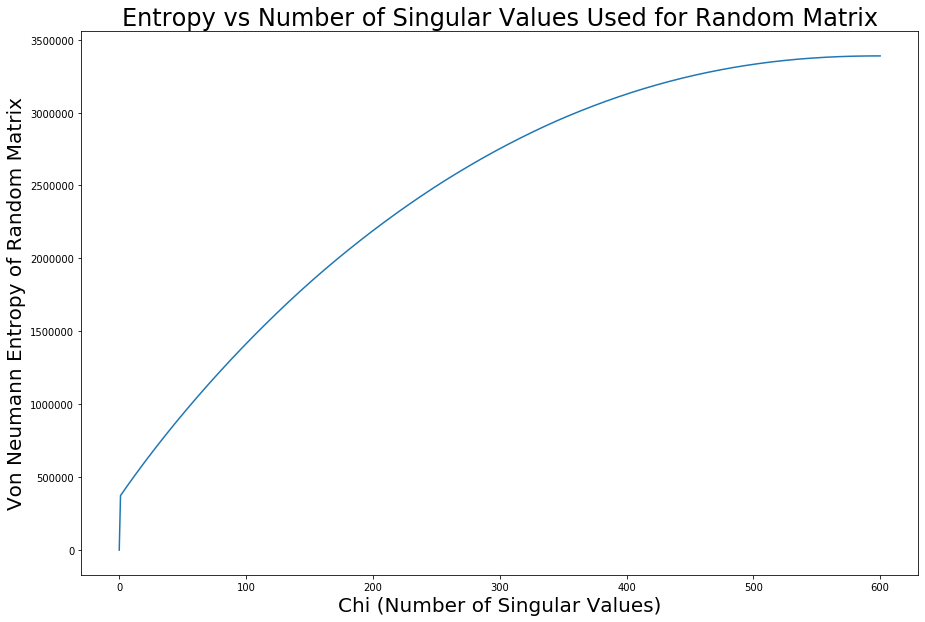

In [288]:
randomEntropyList.insert(0,0)
chi = np.linspace(0, len(sigma), len(sigma)+1)

plt.figure(figsize=(15,10)) 
plt.title('Entropy vs Number of Singular Values Used for Random Matrix', fontsize = 24)
plt.xlabel('Chi (Number of Singular Values)', fontsize = 20) # Labeling the x-axis
plt.ylabel('Von Neumann Entropy of Random Matrix', fontsize = 20) # Labeling the x-axis
plt.plot(chi, randomEntropyList)
plt.show()

As we can see, the random matrix has a much higher entropy than the image matrix, which makes sense, because randomness has the highest entropy in complexity. Now, let's make a model just like we did for part b. 

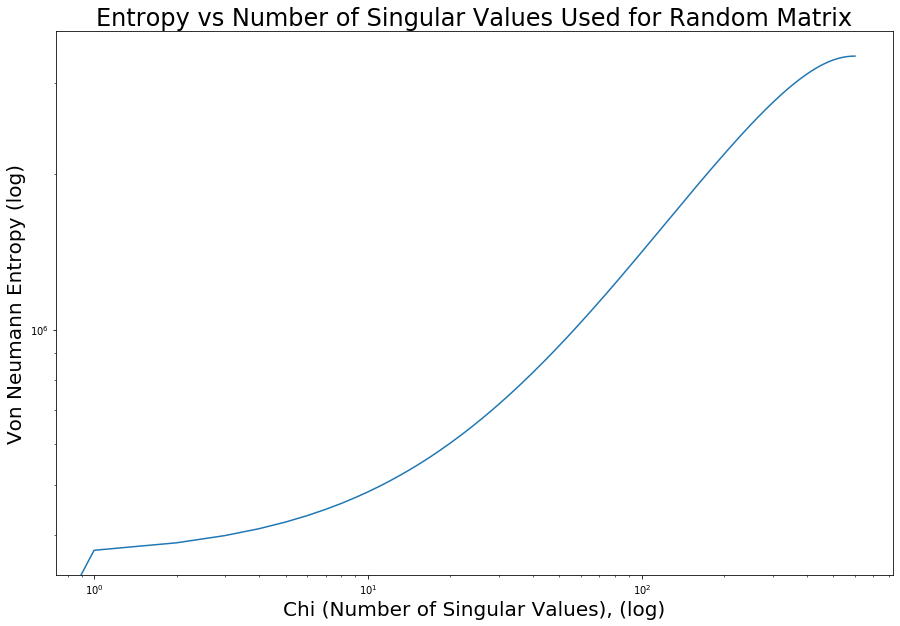

In [289]:
plt.figure(figsize=(15,10)) 
plt.title('Entropy vs Number of Singular Values Used for Random Matrix', fontsize = 24)
plt.yscale("log")
plt.xscale("log")
plt.xlabel('Chi (Number of Singular Values), (log)', fontsize = 20) # Labeling the x-axis
plt.ylabel('Von Neumann Entropy (log)', fontsize = 20) # Labeling the x-axis
plt.plot(chi, randomEntropyList)
plt.show()

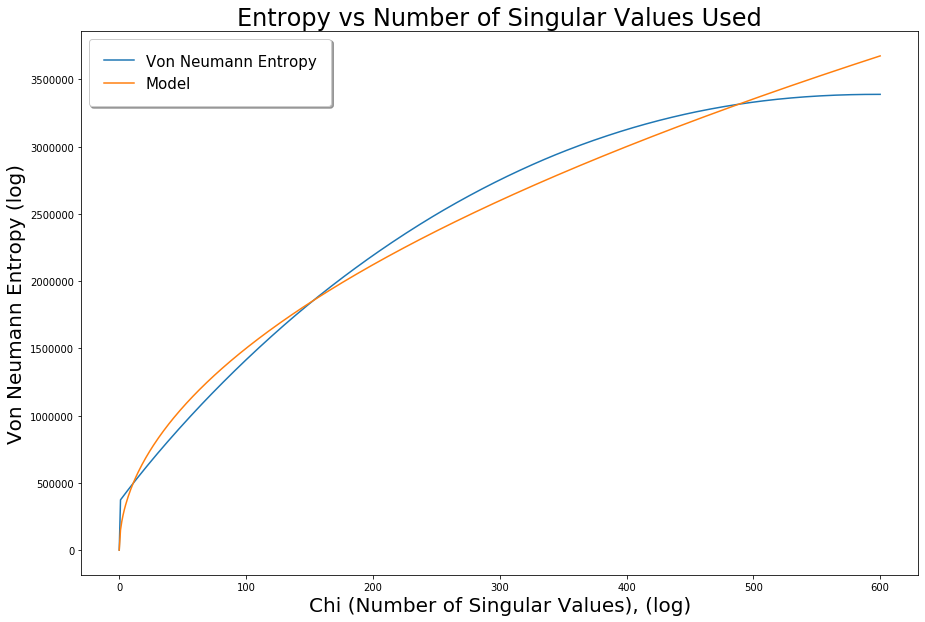

In [290]:
randomModel = []
for i in range(len(chi)):
    randomModel.append((150000 * ((chi[i])**(0.5))))
    
plt.figure(figsize=(15,10)) 
plt.title('Entropy vs Number of Singular Values Used', fontsize = 24)
plt.xlabel('Chi (Number of Singular Values), (log)', fontsize = 20) # Labeling the x-axis
plt.ylabel('Von Neumann Entropy (log)', fontsize = 20) # Labeling the x-axis
plt.plot(chi, randomEntropyList, label = "Von Neumann Entropy")
plt.plot(chi, randomModel, label = "Model")
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 15})
plt.show()

In [291]:
# Chi-square GOF

# Removing Values that would interfere with solving for Chi-squared
del randomEntropyList[0]
del randomModel[0]


#Finding Chi-squared
randomChiSquared = 0
for i in range(len(entropyList)):
    randomChiSquared += (((randomEntropyList[i]-randomModel[i])**2)/(randomModel[i]))

    
print("Chi^2 =", randomChiSquared)

Chi^2 = 4088764.0545853167


This goodness of fit is not as great, but it was harder for me to fit this model for some reason. Now we want to know how many singular values it will take in order to get a certain percentage of the information. For this, let's assume that our maximum information is with all 600 of the chi-square values, and let's say we want the minimun singular value number that gives us 90% of the information. Let's test and see how many singular values it takes for both our image and our random matrix.

In [294]:
threshold = 0.9 * (entropyList[-1])
randomThreshold = 0.9 * (randomEntropyList[-1])

singularCutoff = 0
randomSingularCutoff = 0

for i in range(len(entropyList)):
    if (entropyList[i] >= threshold):
        singularCutoff = i
        break

for i in range(len(randomEntropyList)):
    if (randomEntropyList[i] >= randomThreshold):
        randomSingularCutoff = i
        break
        
print("Number of singular values needed to reach 90% of Image Matrix =  ", singularCutoff)
print("Number of singular values needed to reach 90% of Random Matrix =", randomSingularCutoff)

Number of singular values needed to reach 90% of Image Matrix =   25
Number of singular values needed to reach 90% of Random Matrix = 375


As we can see, we arrive to about 90% of the total information in the image within on 25 singular values for the image matrix, while in the random matrix, we actually need 375 singular values in order to get to the same percentage. What this means qualitatively is that our brain is able to pick out and decipher what the picture for the image is much quicker than the picture for the random matrix. This makes sense, because our brain is trying to match both matrices with something known, something non-random. As the random matrix continues to add singular values, we attempt to match it to something with order, but at around 375 singular values, when we have 90% of the information, we know that actually, this matrix is just random, and there is no underlying image.

#### e. 

From what I have found online, the Gibbs/Shannon entropy is the classical form of entropy, while the Von Neumann is the quantum extension of the Gibbs/Shannon model, sort of like how quantum physics is an extension of the classical Newtonian physics. Gibbs/Shannon entropy only takes into account thermodynamic uncertainty, while the Von Neumann model takes into account both thermodynamic and quantum uncertainties, making it more applicable when a quantum effect is apparent, say for low-mass particles moving extremely fast. The Gibbs/Shannon Model uses the following equation:

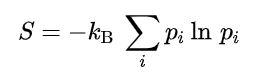

Some few quick differences is that rather than taking a trace, the Gibbs/Shannon model multiplies by Boltzmann's constant out front. It also has a natural log base, rather than just using any log base. Let's see if we can calculate the Gibbs/Shannon Entropy of our cropped image and compare it to the Von Neumann Entropy we already calculated.

In [302]:
def gibbsEntropy(matrix):

    logMatrix = []
    row = []
    for i in range(len(matrix)):
        for j in range (len(matrix[0])):
            if (matrix[i][j] != 0):
                row.append(math.log(matrix[i][j]))
            else:
                row.append(0)
        logMatrix.append(row)
        row = [] 
    newMatrix = np.matmul(matrix, logMatrix)
    summation = np.sum(newMatrix)
    return (((1.38)*(10**(-23)))*(summation))

In [305]:
print("Gibbs Entropy =", gibbsEntropy(croppedImage))
print("Von Neumann Entropy =", Entropy(croppedImage))

Gibbs Entropy = 2.4567934899830097e-12
Von Neumann Entropy = 128846275.42232569


The Gibbs entropy is often much lower than the Von Neumann entropy, because of the multiplying out front by Boltzmann's constant, a very low number. Gibbs/Shannon Entropy would most likely not be used when working with some of the objects such as the ones we have been working in, specifically qubits. Qubits are part of quantum computing, so it would make sense that their information involves some sort of quantum uncertainty. For this reason, if we are trying to find the information from a network of entangled qubits, which is represented by a matrix, it would make much more sense to find the Von Neumann entropy rather than thhe Gibbs/Shannon Entropy.

### Collaborators

Robert White
Gavin Sher
Tanner Eubanks